<a href="https://www.kaggle.com/code/priyankamukulsharma/binary-classification-pima-indian-diabetes?scriptVersionId=98143629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

While working on Iris Dataset we worked on a balanced dataset (also it was a multiclass classification). Now we will work on an slightly imbalanced dataset.
I have choosen pima-indians-diabetes-database for this notebook.
We will apply the ML lifecycle to this dataset.
Collecting Data -->EDA-->Modelling-->Evaluating model-->Deployment.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%config Completer.use_jedi = False
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from pandas_profiling import ProfileReport
import scipy.stats
%matplotlib inline
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# **Collecting Data**

In [2]:
dataset=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

# **EDA of the dataset.**

# We can use pandas_profiling to get overall information about the dataset.

In [3]:
#file=ProfileReport(dataset)
#file.to_file(output_file="output.html")

# For blood pressure lets perform the Shapiro-Wilk test of normality. The null hypothesis (Ho) is that the data is normal.

In [4]:
from scipy.stats import shapiro

stat,p=shapiro(dataset['BloodPressure'])
print('Statistics=%.3f,p=%.3f' %(stat,p))

Statistics=0.819,p=0.000


By looking at the graph it seems that the distribution is Normal but after sharipo test (as p<0.005) we can say distribution is not normal. The p-value is less then .005 so we reject our null hypothesis.

In [5]:
dataset.shape

(768, 9)

In [6]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Lets look at the BloodPressure feature.

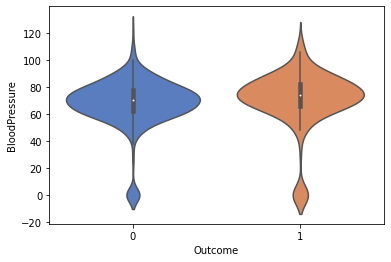

In [7]:
ax=sns.violinplot(x='Outcome',y='BloodPressure',data=dataset,palette='muted',split=True)


From the violin plot it is seems that Bloodpressure for Diabetic is more than for Non diabetics.
There are 4.6% values zeros. We need to treat them. We can seperately replace them for diabetics and non diabetics. 
Zeros ca be replaced with the median for diabetic and non diabetics.

In [8]:
df1=dataset.loc[dataset['Outcome']==1]
df2=dataset.loc[dataset['Outcome']==0]

df1=df1.replace({'BloodPressure':0},np.median(dataset['BloodPressure']))
df2=df2.replace({'BloodPressue':0},np.median(dataset['BloodPressure']))
dataframe=[df1,df2]
dataset=pd.concat(dataframe)
dataset
df1.shape

(268, 9)

Like BloodPressure we need to treat BMI also.

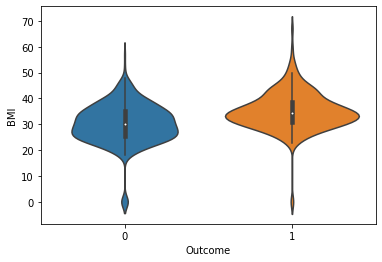

In [9]:
df1ax=sns.violinplot(x='Outcome',y='BMI',data=dataset,split=True)

In [10]:
df1=df1.replace({'BMI':0},np.median(df1['BMI']))
df2=df2.replace({'BMI':0},np.median(df2['BMI']))


In [11]:
dataframe=[df1,df2]
dataset=pd.concat(dataframe)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


For rest of the features also we will do the same as done for BMI and BloodPressure.

In [12]:
df1=df1.replace({'DiabetesPedigreeFunction':0},np.median(df1['DiabetesPedigreeFunction']))
df2=df2.replace({'DiabetesPedigreeFunction':0},np.median(df1['DiabetesPedigreeFunction']))
dataframe=[df1,df2]
dataset=pd.concat(dataframe)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [13]:
df1=df1.replace({'Glucose':0},np.median(df1['Glucose']))
df2=df2.replace({'Glucose':0},np.median(df2['Glucose']))
dataframe=[df1,df2]
dataset=pd.concat(dataframe)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [14]:
df1=df1.replace({'Insulin':0},np.mean(df1['Insulin']))
df2=df2.replace({'Insulin':0},np.mean(df2['Insulin']))
dataframe=[df1,df2]
dataset=pd.concat(dataframe)
dataset



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,100.335821,33.6,0.627,50,1
2,8,183,64,0,100.335821,23.3,0.672,32,1
4,0,137,40,35,168.000000,43.1,2.288,33,1
6,3,78,50,32,88.000000,31.0,0.248,26,1
8,2,197,70,45,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,68.792000,22.5,0.142,33,0
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,68.792000,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0


In [15]:
from scipy.stats import pearsonr
corr,_=pearsonr(dataset['Pregnancies'],dataset['Age'])
corr

0.5443412284023389

As corr is not very high we cannot say Age and pregnancies are highly correlated.

# Splitting the dataset into independent and dependent features.

In [16]:
X=dataset.drop('Outcome',axis=1).values
y=dataset['Outcome']

In [17]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       [  0.   , 137.   ,  40.   , ...,  43.1  ,   2.288,  33.   ],
       ...,
       [  2.   , 122.   ,  70.   , ...,  36.8  ,   0.34 ,  27.   ],
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 60.0 KB


In [19]:

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[ 0.63994726,  0.86462486,  0.08446385, ...,  0.16958256,
         0.46849198,  1.4259954 ],
       [ 1.23388019,  2.01426457, -0.40007946, ..., -1.3283415 ,
         0.60439732, -0.10558415],
       [-1.14185152,  0.50330953, -1.8537094 , ...,  1.551163  ,
         5.4849091 , -0.0204964 ],
       ...,
       [-0.54791859,  0.01060679, -0.03667198, ...,  0.63495703,
        -0.39828208, -0.53102292],
       [ 0.3429808 , -0.02224005,  0.08446385, ..., -0.90659589,
        -0.68519336, -0.27575966],
       [-0.84488505, -0.94195182, -0.03667198, ..., -0.2957919 ,
        -0.47378505, -0.87137393]])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [21]:
len(y_train)

537

<AxesSubplot:xlabel='Outcome', ylabel='Count'>

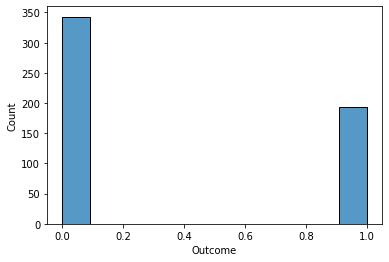

In [22]:
sns.histplot(y_train)

Since there is a disbalance in the classes we will use SMOTE.

In [23]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
len(y_train)

686

# After sampling with SMOTE we have equal number of samples.

<AxesSubplot:xlabel='Outcome', ylabel='Count'>

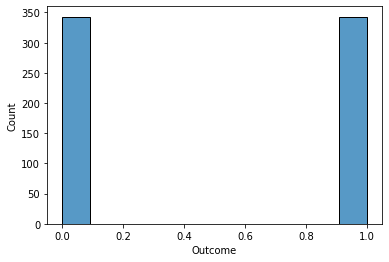

In [24]:
sns.histplot(y_train)

In [25]:
ssc=StandardScaler()
X_scaled=ssc.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.86462486,  0.08446385, ...,  0.16958256,
         0.46849198,  1.4259954 ],
       [ 1.23388019,  2.01426457, -0.40007946, ..., -1.3283415 ,
         0.60439732, -0.10558415],
       [-1.14185152,  0.50330953, -1.8537094 , ...,  1.551163  ,
         5.4849091 , -0.0204964 ],
       ...,
       [-0.54791859,  0.01060679, -0.03667198, ...,  0.63495703,
        -0.39828208, -0.53102292],
       [ 0.3429808 , -0.02224005,  0.08446385, ..., -0.90659589,
        -0.68519336, -0.27575966],
       [-0.84488505, -0.94195182, -0.03667198, ..., -0.2957919 ,
        -0.47378505, -0.87137393]])

In [26]:
import pickle

In [27]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [28]:

pickle.dump(logreg,open("pima-diabetes.pkl","wb"))

In [29]:
from sklearn.metrics import f1_score,precision_score,recall_score
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))


0.6625
0.6162790697674418
0.7162162162162162


In [30]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = "rbf")
classifier_rbf.fit(X_train, y_train)
y_pred = classifier_rbf.predict(X_test)
print("Accuracy of SVC (RBF) classifier on test set: {:.2f}".format(classifier_rbf.score(X_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of SVC (RBF) classifier on test set: 0.79
0.7718518518518518
0.7644230769230769
0.7864090204854537


To remove the NANs lets visualize the data distribution.

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(X_test, y_test)))

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.87
0.860950245967993
0.8515310233682514
0.8754949216732657


https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe

Now looking at the target variable.

This dataset is slightly imbalanced witn ~65:35 ratio.

SkinThickness and BMI seem to have linear relationship.

Lets have a look at the corelation between the variables.

There is medium correlation between Pregnancies and Age and Skinthikness and BMI.